In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [6]:
id_file = r'/Users/rajdeep_ch/Documents/nma/project/hcp_task/subjects_list.txt' 

In [7]:
id_subject = np.loadtxt(id_file)

In [8]:
id_subject

array([100307., 100408., 101915., 102816., 103414., 103515., 103818.,
       105115., 105216., 106016., 106319., 110411., 111009., 111312.,
       111514., 111716., 113215., 113619., 114924., 115320., 117122.,
       117324., 118730., 118932., 119833., 120111., 120212., 122317.,
       123117., 124422., 125525., 126325., 127933., 128632., 129028.,
       130013., 130316., 130922., 131924., 133625., 133827., 133928.,
       134324., 135932., 136833., 137128., 138231., 138534., 139637.,
       140824., 142828., 143325., 148032., 148335., 149337., 149539.,
       150524., 151223., 151526., 151627., 153025., 153429., 154431.,
       156233., 156637., 157336., 158035., 158540., 159239., 159340.,
       160123., 161731., 162329., 162733., 163129., 163432., 167743.,
       172332., 175439., 176542., 178950., 182739., 185139., 188347.,
       189450., 190031., 192439., 192540., 193239., 194140., 196144.,
       196750., 197550., 198451., 199150., 199655., 200614., 201111.,
       201414., 2051

In [20]:
subjects = [str(int(sub_id)) for sub_id in id_subject]

In [22]:
subjects

['100307',
 '100408',
 '101915',
 '102816',
 '103414',
 '103515',
 '103818',
 '105115',
 '105216',
 '106016',
 '106319',
 '110411',
 '111009',
 '111312',
 '111514',
 '111716',
 '113215',
 '113619',
 '114924',
 '115320',
 '117122',
 '117324',
 '118730',
 '118932',
 '119833',
 '120111',
 '120212',
 '122317',
 '123117',
 '124422',
 '125525',
 '126325',
 '127933',
 '128632',
 '129028',
 '130013',
 '130316',
 '130922',
 '131924',
 '133625',
 '133827',
 '133928',
 '134324',
 '135932',
 '136833',
 '137128',
 '138231',
 '138534',
 '139637',
 '140824',
 '142828',
 '143325',
 '148032',
 '148335',
 '149337',
 '149539',
 '150524',
 '151223',
 '151526',
 '151627',
 '153025',
 '153429',
 '154431',
 '156233',
 '156637',
 '157336',
 '158035',
 '158540',
 '159239',
 '159340',
 '160123',
 '161731',
 '162329',
 '162733',
 '163129',
 '163432',
 '167743',
 '172332',
 '175439',
 '176542',
 '178950',
 '182739',
 '185139',
 '188347',
 '189450',
 '190031',
 '192439',
 '192540',
 '193239',
 '194140',
 '196144',

--- 
Helper Functions

In [ ]:
N_SUBJECTS = 339

# The data have already been aggregated into ROIs from the Glasesr parcellation
N_PARCELS = 360

# The acquisition parameters for all tasks were identical
TR = 0.72  # Time resolution, in sec

# The parcels are matched across hemispheres with the same order
HEMIS = ["Right", "Left"]

# Each experiment was repeated multiple times in each subject
N_RUNS_REST = 4
N_RUNS_TASK = 2

# Time series data are organized by experiment, with each experiment
# having an LR and RL (phase-encode direction) acquistion
BOLD_NAMES = [
  "rfMRI_REST1_LR", "rfMRI_REST1_RL",
  "rfMRI_REST2_LR", "rfMRI_REST2_RL",
  "tfMRI_MOTOR_RL", "tfMRI_MOTOR_LR",
  "tfMRI_WM_RL", "tfMRI_WM_LR",
  "tfMRI_EMOTION_RL", "tfMRI_EMOTION_LR",
  "tfMRI_GAMBLING_RL", "tfMRI_GAMBLING_LR",
  "tfMRI_LANGUAGE_RL", "tfMRI_LANGUAGE_LR",
  "tfMRI_RELATIONAL_RL", "tfMRI_RELATIONAL_LR",
  "tfMRI_SOCIAL_RL", "tfMRI_SOCIAL_LR"
]

# You may want to limit the subjects used during code development.
# This will use all subjects:
#subjects = range(N_SUBJECTS)

HCP_DIR = r'/Users/rajdeep_ch/Documents/nma/project'

In [18]:
# not needed for time being since not working with imaging data

'''
def get_image_ids(name):
  """Get the 1-based image indices for runs in a given experiment.

    Args:
      name (str) : Name of experiment ("rest" or name of task) to load
    Returns:
      run_ids (list of int) : Numeric ID for experiment image files

  """
  run_ids = [
             i for i, code in enumerate(BOLD_NAMES, 1) if name.upper() in code
             ]
  if not run_ids:
    raise ValueError(f"Found no data for '{name}'")
  return run_ids
'''

'\ndef get_image_ids(name):\n  """Get the 1-based image indices for runs in a given experiment.\n\n    Args:\n      name (str) : Name of experiment ("rest" or name of task) to load\n    Returns:\n      run_ids (list of int) : Numeric ID for experiment image files\n\n  """\n  run_ids = [\n             i for i, code in enumerate(BOLD_NAMES, 1) if name.upper() in code\n             ]\n  if not run_ids:\n    raise ValueError(f"Found no data for \'{name}\'")\n  return run_ids\n'

In [13]:
def load_timeseries(subject, name, dir,
                    runs=None, concat=True, remove_mean=True):
  """Load timeseries data for a single subject.

  Args:
    subject (int): 0-based subject ID to load
    name (str) : Name of experiment ("rest" or name of task) to load
    dir (str) : data directory
    run (None or int or list of ints): 0-based run(s) of the task to load,
      or None to load all runs.
    concat (bool) : If True, concatenate multiple runs in time
    remove_mean (bool) : If True, subtract the parcel-wise mean

  Returns
    ts (n_parcel x n_tp array): Array of BOLD data values

  """
  # Get the list relative 0-based index of runs to use
  if runs is None:
    runs = range(N_RUNS_REST) if name == "rest" else range(N_RUNS_TASK)
  elif isinstance(runs, int):
    runs = [runs]

  # Get the first (1-based) run id for this experiment
  offset = get_image_ids(name)[0]

  # Load each run's data
  bold_data = [
               load_single_timeseries(subject,
                                      offset + run,
                                      dir,
                                      remove_mean) for run in runs
               ]

  # Optionally concatenate in time
  if concat:
    bold_data = np.concatenate(bold_data, axis=-1)

  return bold_data


In [14]:
def load_single_timeseries(subject, bold_run, dir, remove_mean=True):
  """Load timeseries data for a single subject and single run.

  Args:
    subject (int): 0-based subject ID to load
    bold_run (int): 1-based run index, across all tasks
    dir (str) : data directory
    remove_mean (bool): If True, subtract the parcel-wise mean

  Returns
    ts (n_parcel x n_timepoint array): Array of BOLD data values

  """
  bold_path = os.path.join(dir, "subjects", str(subject), "timeseries")
  bold_file = f"bold{bold_run}_Atlas_MSMAll_Glasser360Cortical.npy"
  ts = np.load(os.path.join(bold_path, bold_file))
  if remove_mean:
    ts -= ts.mean(axis=1, keepdims=True)
  return ts

In [15]:
def load_evs(subject, name, condition, dir):
  """Load EV (explanatory variable) data for one task condition.

  Args:
    subject (int): 0-based subject ID to load
    name (str) : Name of task
    condition (str) : Name of condition
    dir (str) : data directory

  Returns
    evs (list of dicts): A dictionary with the onset, duration, and amplitude
      of the condition for each run.

  """
  evs = []
  for id in get_image_ids(name):
    task_key = BOLD_NAMES[id - 1]
    ev_file = os.path.join(dir, "subjects", str(subject), "EVs",
                           task_key, f"{condition}.txt")
    ev_array = np.loadtxt(ev_file, ndmin=2, unpack=True)
    ev = dict(zip(["onset", "duration", "amplitude"], ev_array))
    evs.append(ev)
  return evs

In [16]:
def condition_frames(run_evs, skip=0):
  """Identify timepoints corresponding to a given condition in each run.

  Args:
    run_evs (list of dicts) : Onset and duration of the event, per run
    skip (int) : Ignore this many frames at the start of each trial, to account
      for hemodynamic lag

  Returns:
    frames_list (list of 1D arrays): Flat arrays of frame indices, per run

  """
  frames_list = []
  for ev in run_evs:

    # Determine when trial starts, rounded down
    start = np.floor(ev["onset"] / TR).astype(int)

    # Use trial duration to determine how many frames to include for trial
    duration = np.ceil(ev["duration"] / TR).astype(int)

    # Take the range of frames that correspond to this specific trial
    frames = [s + np.arange(skip, d) for s, d in zip(start, duration)]

    frames_list.append(np.concatenate(frames))

  return frames_list


In [17]:
def selective_average(timeseries_data, ev, skip=0):
  """Take the temporal mean across frames for a given condition.

  Args:
    timeseries_data (array or list of arrays): n_parcel x n_tp arrays
    ev (dict or list of dicts): Condition timing information
    skip (int) : Ignore this many frames at the start of each trial, to account
      for hemodynamic lag

  Returns:
    avg_data (1D array): Data averagted across selected image frames based
    on condition timing

  """
  # Ensure that we have lists of the same length
  if not isinstance(timeseries_data, list):
    timeseries_data = [timeseries_data]
  if not isinstance(ev, list):
    ev = [ev]
  if len(timeseries_data) != len(ev):
    raise ValueError("Length of `timeseries_data` and `ev` must match.")

  # Identify the indices of relevant frames
  frames = condition_frames(ev, skip)

  # Select the frames from each image
  selected_data = []
  for run_data, run_frames in zip(timeseries_data, frames):
    run_frames = run_frames[run_frames < run_data.shape[1]]
    selected_data.append(run_data[:, run_frames])

  # Take the average in each parcel
  avg_data = np.concatenate(selected_data, axis=-1).mean(axis=-1)

  return avg_data

In [34]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from seaborn.regression import corrplot

ImportError: cannot import name 'corrplot' from 'seaborn.regression' (/Users/rajdeep_ch/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py)

In [24]:
sns.set(style='darkgrid')

In [31]:
rs = np.random.RandomState(33)
mat = rs.normal(size=(100,30))

AttributeError: 'QuadMesh' object has no property 'sig_stars'

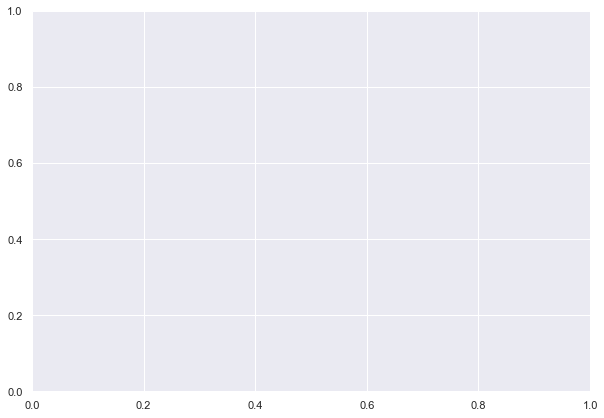

In [32]:
f, ax = plt.subplots(figsize=(10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(mat,annot=False,sig_stars=False,diag_name=False,cmap=cmap,ax=ax)
f.tight_layout()

In [62]:
test_df = pd.DataFrame({'data':2 * mat[:,1],'data1': 10 * mat[:,3]})

In [63]:
test_df.head()

,data,data1
0,-3.205961,-5.704009
1,-2.432648,-2.067899
2,-1.231125,-28.093946
3,1.629731,-4.804094
4,1.499791,-7.605994


In [64]:
corr_mat = test_df.corr()

/var/folders/yr/xs9chqf96k95nh97118j_s7m0000gn/T/ipykernel_21351/3243144388.py:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolor(corr_mat)
/var/folders/yr/xs9chqf96k95nh97118j_s7m0000gn/T/ipykernel_21351/3243144388.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


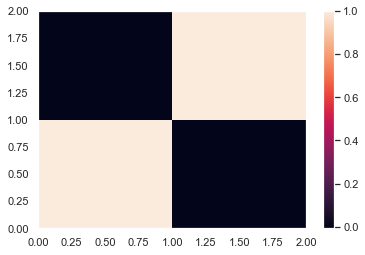

In [65]:
plt.figure()
plt.pcolor(corr_mat)
plt.colorbar()